# Example of abnormal detection for text data

In [ ]:
from preprocessing.embeddedText import *
text = amazoneText("finefoods.txt")
len(text.word_vec)

100% (5116093 of 5116093) |##############| Elapsed Time: 0:00:38 Time:  0:00:38


## Find with reconstruction errors from Autoencoder

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

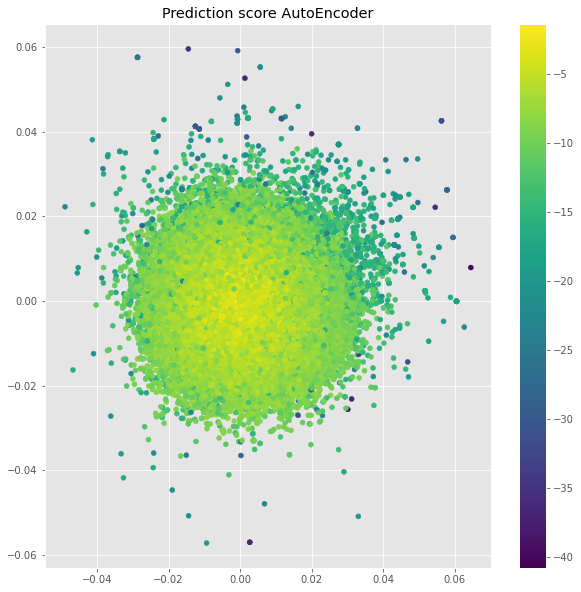

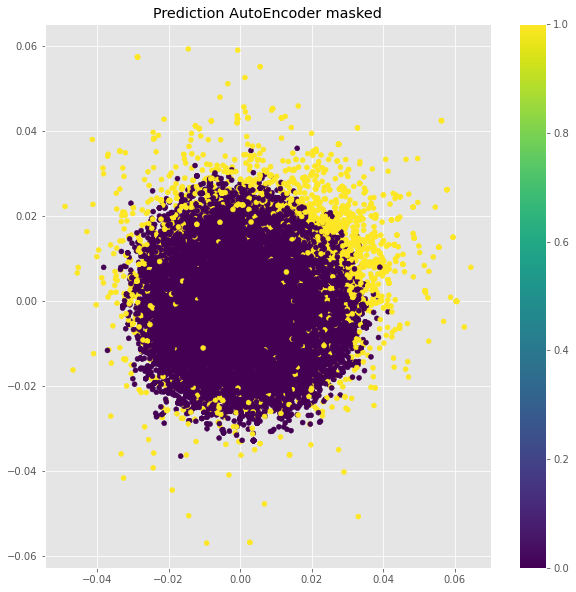

In [3]:
import occ

autoEncoder = occ.occ()
autoEncoder.X = text.word_vec
autoEncoder.train(model='autoEncoder', hidden_neurons=[64,32,16,4,4,16,32,64], epochs=2, nu=0.01)
Y_hat = autoEncoder.predict()
autoEncoder.show_projection(autoEncoder.X, autoEncoder.get_score(autoEncoder.X), title="Prediction score AutoEncoder", markersize=100)
autoEncoder.show_projection(autoEncoder.X, Y_hat, title="Prediction AutoEncoder masked", markersize=100)

scores = autoEncoder.get_score(autoEncoder.X)
scores = np.squeeze(scores)
abnormal_idx = list(np.argsort(scores, axis=0))

In [6]:
### Abnormal samples
print("Abnormals:")
for i in range(50):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

print("\n\n\n")
### Normal samples
print("Normals:")
for i in range(300000,300050):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

Abnormals:
 trick or treat? => 1.0 0/1
[ FedEx apparently delivered....to someone elses door! Never received them-not exactly what I had in mind when I ordered them for my college girl!]


 love love love => 5.0 0/0
[ bruuuuuu!!!]


 Cheap => 1.0 3/3
[ Cheap]


 NOTE => 1.0 1/2
[ NOTE]


 delicious => 5.0 1/1
[]


 UPDATED => 5.0 2/4
[]


 UPDATED => 5.0 2/4
[]


 Vomitondo => 1.0 3/8
[ Pros]


 Awesome!!!!!!! => 5.0 0/0
[]


 Update => 3.0 0/0
[ UPDATE]


 bad bad bad => 1.0 1/4
[]


 Love love love. => 5.0 0/0
[ Simple]


 WARNING ! => 1.0 2/4
[ WARNING]


 WARNING => 1.0 13/21
[ WARNING]


 best crackers ever - Olive Oil and Sea Salt => 4.0 0/0
[ These crackers have a unique flavor and are especially good with a thin slice of Havarti cheese.  They do not feel oily or salty but have a subtle taste of both.]


 Yum => 5.0 0/1
[ yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum. yu

## Find with Isolation forest.

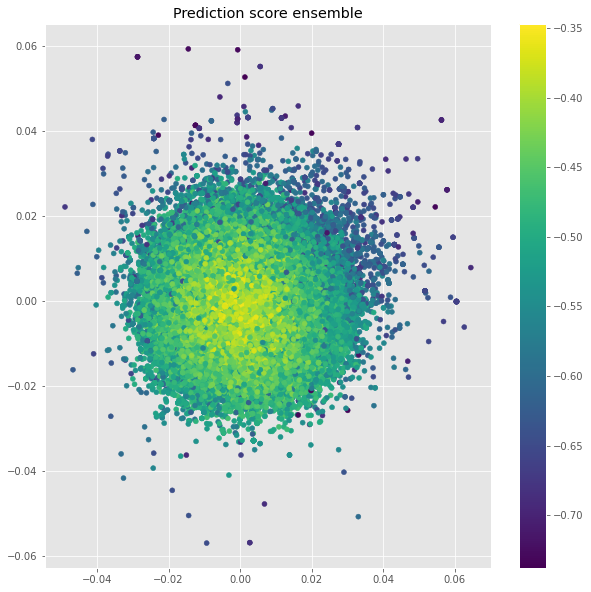

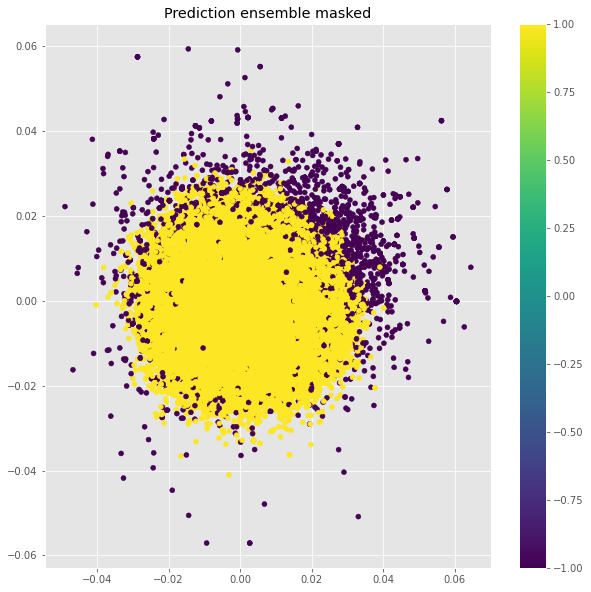

In [7]:
import occ

isoForest = occ.occ()
isoForest.X = text.word_vec
isoForest.train(model='isolationForest', nu=0.01)
Y_hat = isoForest.predict()
isoForest.show_projection(isoForest.X, isoForest.get_score(isoForest.X), title="Prediction score ensemble", markersize=100)
isoForest.show_projection(isoForest.X, Y_hat, title="Prediction ensemble masked", markersize=100)

scores = isoForest.get_score(isoForest.X)
scores = np.squeeze(scores)
abnormal_idx = list(np.argsort(scores, axis=0))

In [8]:
### Abnormal samples
print("Abnormals:")
for i in range(50):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

print("\n\n\n")
### Normal samples
print("Normals:")
for i in range(300000,300050):
    print(text.raw_title[abnormal_idx[i]] + " => " + str(text.scores[abnormal_idx[i]]) + text.raw_helpfulness[abnormal_idx[i]])
    print("[{}]".format(text.raw_reviews[abnormal_idx[i]]))
    print("\n")

Abnormals:
 delicious => 5.0 1/1
[]


 Vomitondo => 1.0 3/8
[ Pros]


 love love love => 5.0 0/0
[ bruuuuuu!!!]


 Update => 3.0 0/0
[ UPDATE]


 Yum => 5.0 0/1
[ yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum. yum in the microwave and yum in the freezer. yum yum yummers!]


 Yummy => 5.0 1/1
[ Delicious]


 Yummy => 5.0 1/1
[ Delicious]


 Yummy => 5.0 1/1
[ Delicious]


 Yummy => 5.0 1/1
[ Delicious]


 love them => 5.0 0/1
[ These are good but are not sweet! Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good,]


 Great price => 4.0 0/0
[ Great price for these, but the 1st pack opened tastes a little stale so we will see when we got through the 3rd how fresh they are or if they were so cheap because they were past shelf life. Couldnt